# Домашнее задание к лекции "Визуализация данных"


### Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

#### Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

#### Дополнительная часть (необязательная)
построить дополнительно не менее 2 визуализаций (итого не менее 6);
в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;

###### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий GitHub. Не сможем проверить или помочь, если вы пришлете:

файлы;
архивы;
скриншоты кода.
Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:
1) Что я делаю?
2) Какого результата я ожидаю?
3) Как фактический результат отличается от ожидаемого?
4) Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

#данные с https://www.kaggle.com/dwdkills/russian-demography?select=russian_demography.csv

df = pd.read_csv('russian_demography.csv')
df.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,2380.000000,2317.000000,2317.000000,2315.000000,2330.000000,2330.000000
mean,2003.500000,-2.344022,11.549245,13.901382,68.474013,69.148704
std,8.079445,6.064389,3.233035,3.499475,10.453587,13.349880
min,1990.000000,-15.900000,6.200000,3.200000,37.500000,23.630000
25%,1996.750000,-6.200000,9.300000,12.100000,61.380000,62.792500
50%,2003.500000,-3.100000,11.000000,14.100000,68.530000,69.575000
75%,2010.250000,0.700000,13.000000,16.100000,76.895000,77.620000
max,2017.000000,24.800000,29.900000,24.900000,97.530000,100.000000


In [32]:
df.head()


,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01


In [33]:
df1 = df.copy()
df1.rename(columns = {'npg':'естественный прирост'}, inplace = True)

df1.head()

,year,region,естественный прирост,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01


In [29]:
dynamics_by_region = df[[x for x in df.columns if 'rate' in x] + ['year']] \
    .groupby('year').sum()
dynamics_by_region

,birth_rate,death_rate
year,,
1990,1177.1,864.5
1991,1063.7,883.6
1992,941.3,950.2
1993,813.8,1120.5
1994,828.5,1215.8
1995,821.8,1176.0
1996,783.8,1126.1
1997,757.7,1091.2
1998,778.0,1078.3


In [34]:
# применяем функцию plot из matplotlib
dynamics_by_region1 = df1[[x for x in df1.columns if 'естественный прирост' in x] + ['year']] \
    .groupby('year').sum()
dynamics_by_region1




,естественный прирост
year,
1990,312.6
1991,180.1
1992,-8.9
1993,-306.7
1994,-387.3
1995,-354.2
1996,-342.3
1997,-333.5
1998,-300.3


Text(0, 0.5, 'разница')

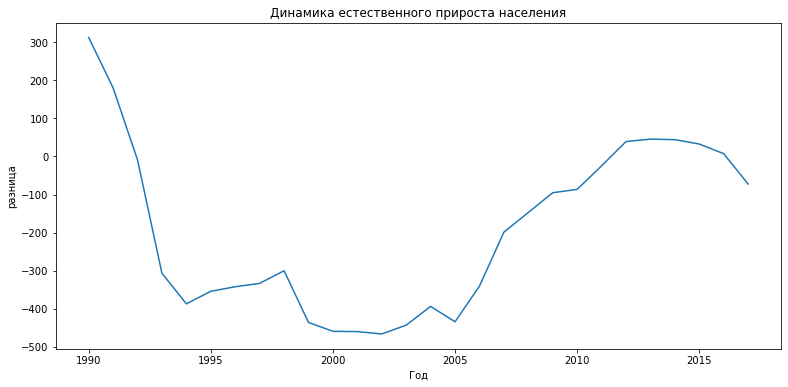

In [35]:
plt.plot(dynamics_by_region1.index, dynamics_by_region1['естественный прирост'])
plt.title('Динамика естественного прироста населения')
plt.xlabel('Год')
plt.ylabel('разница')

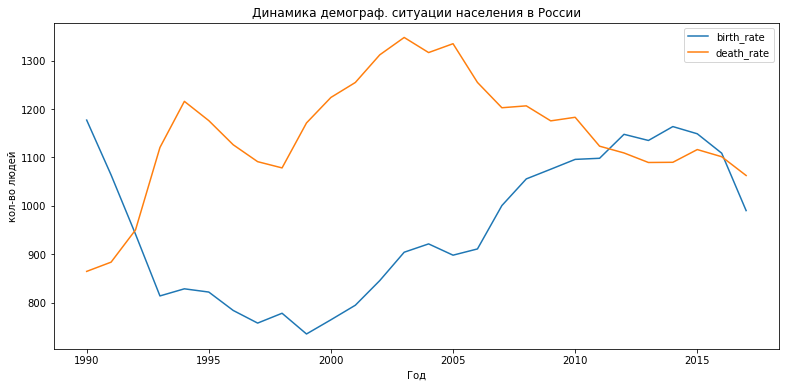

In [36]:
for rate in [x for x in df.columns if 'rate' in x]:
    plt.plot(dynamics_by_region.index, dynamics_by_region[rate])
    plt.title('Динамика демограф. ситуации населения в России')
    plt.xlabel('Год')
    plt.ylabel('кол-во людей') 
    plt.legend(dynamics_by_region)

<AxesSubplot:title={'center':'Урбанизация населения'}, ylabel='Frequency'>

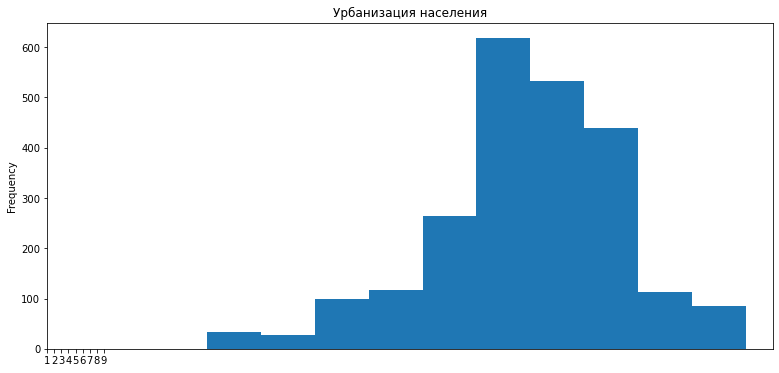

In [43]:
# распределение Урбанизация населения
df.urbanization.plot(kind='hist', 
                   bins=10,
                   title='Урбанизация населения',
                   xlabel='urbanization',
                   ylabel='year',
                   xticks=range(1, 10))

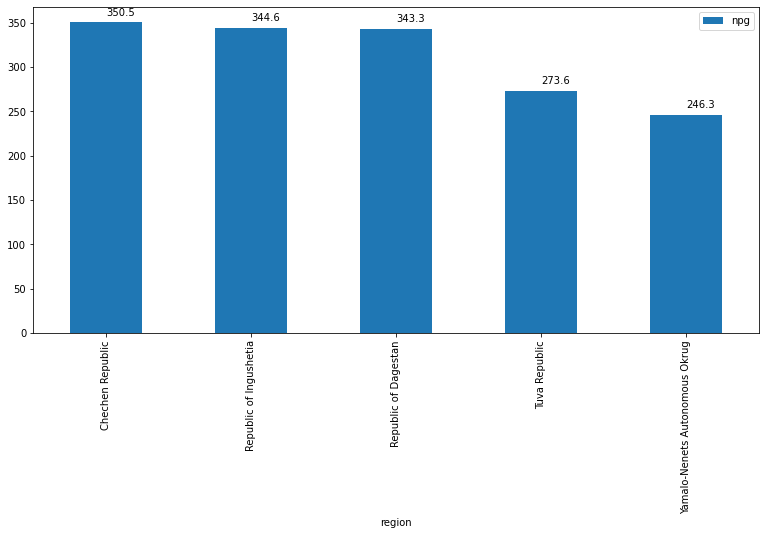

In [51]:
# топ-5 регионов по приросту населения
top5_region = df[['region','npg']].groupby(by='region').sum().sort_values(by='npg', ascending=False).head(5)
ax = top5_region.plot(kind='bar')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'left', va = 'center', 
                xytext = (0,10), 
                textcoords = 'offset points')

<AxesSubplot:xlabel='region'>

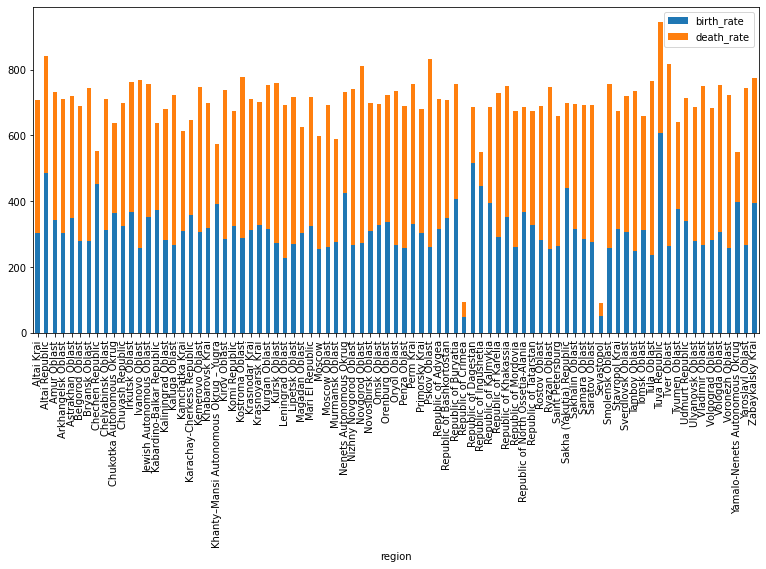

In [57]:
dynamics_by_year = df[[x for x in df.columns if 'rate' in x] + ['region']] \
    .groupby('region').sum()
dynamics_by_year


dynamics_by_year.plot(kind='bar', stacked=True)

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Рождаемость населения по годам')

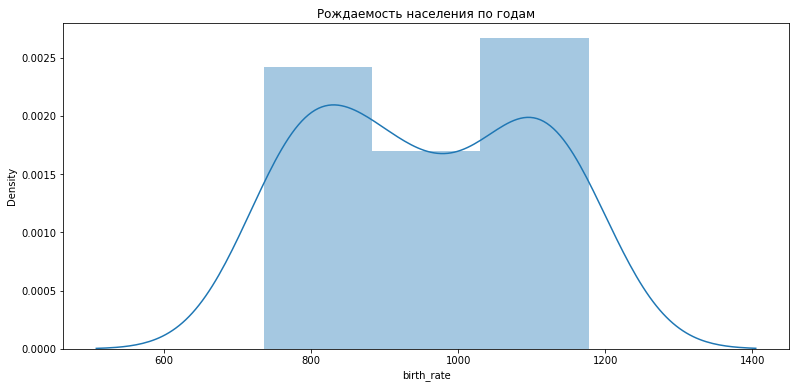

In [61]:
import seaborn as sns
ax = sns.distplot(dynamics_by_region.birth_rate)
ax.set_title('Рождаемость населения по годам')

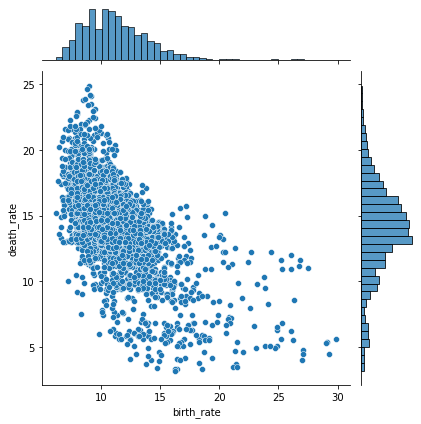

In [65]:
sns.jointplot(x='birth_rate', y='death_rate', 
              data=df, kind='scatter')


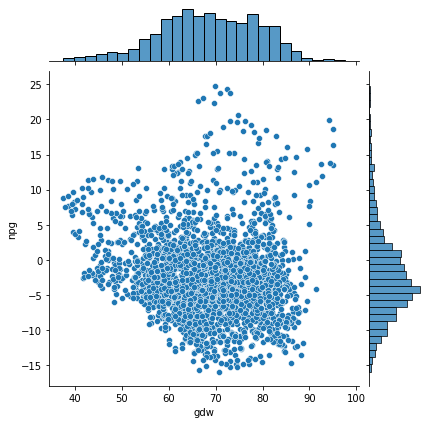

In [64]:
sns.jointplot(x='gdw', y='npg', 
              data=df, kind='scatter')



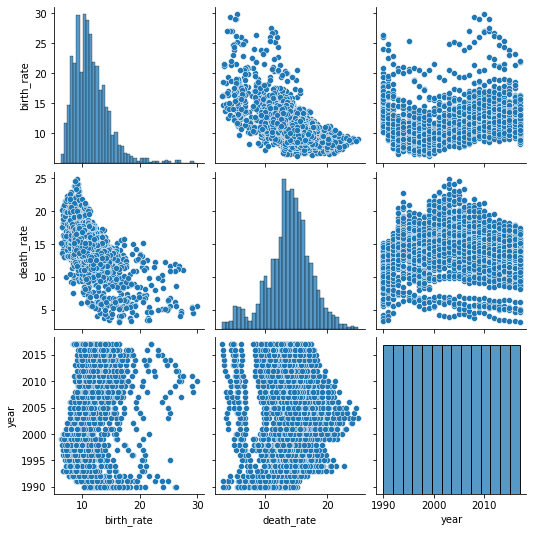

In [67]:
sns.pairplot(df[['region', 'birth_rate', 'death_rate', 'year']])